In [17]:
file = open("data.csv",mode="r")
text=file.read()
text=text.replace(chr(27),",")
file.close()
file = open("data1.csv",mode="w")
file.write(text)
file.close()

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("alert.css", "r").read()
    return HTML("<style>"+styles+"</style>")
css_styling()

<div class="alert simple-alert">
  <p>💡<b>Note</b>: This is a simple alert</p>
</div>

In [166]:
import pandas as pd
import numpy as np
df=pd.read_csv("data1.csv")
df.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [19]:
df.shape

(1030, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Slag              1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   Coarse Aggregate  1030 non-null   float64
 6   Fine Aggregate    1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [21]:
df.describe()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


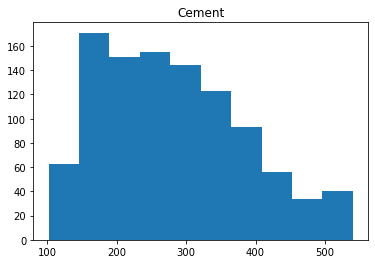

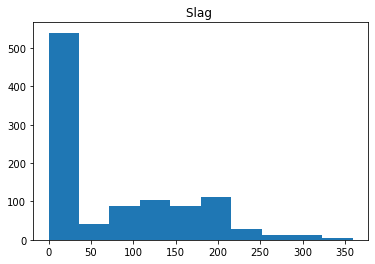

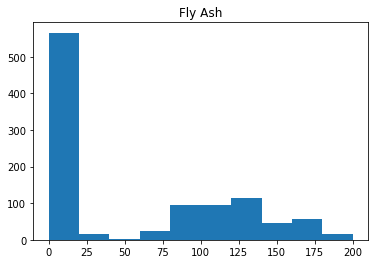

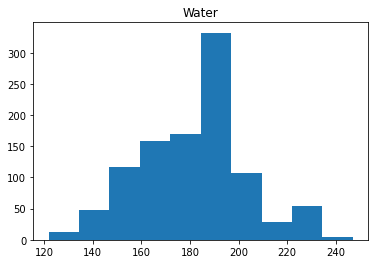

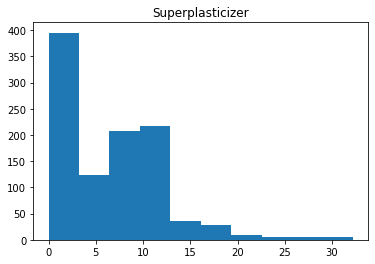

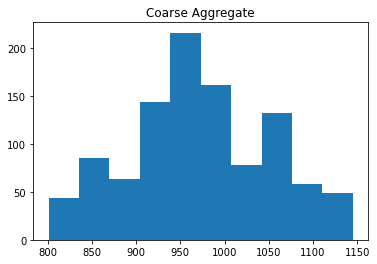

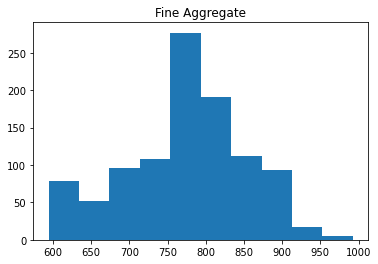

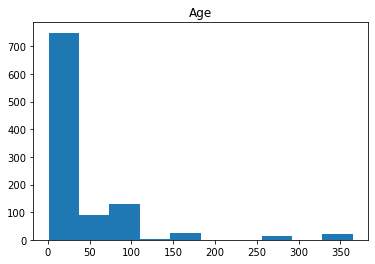

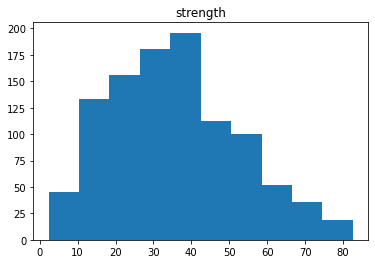

In [23]:
import matplotlib.pyplot as plt
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

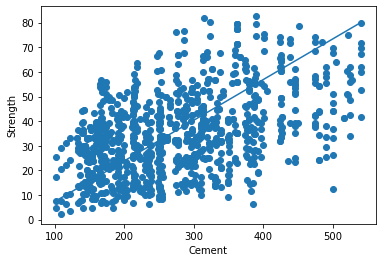

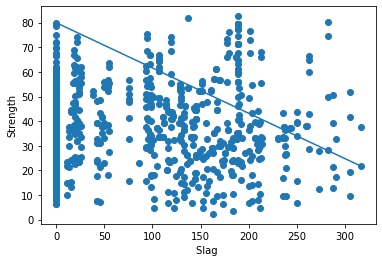

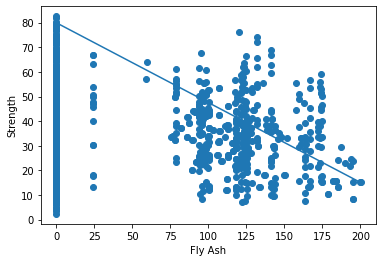

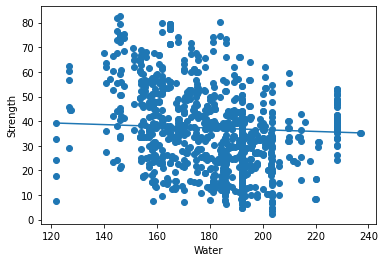

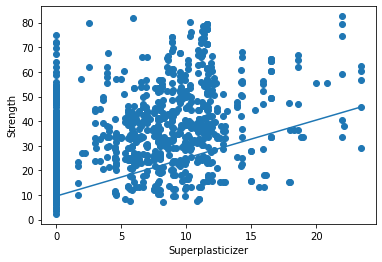

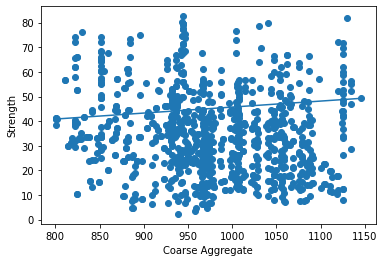

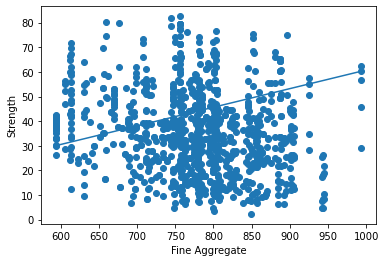

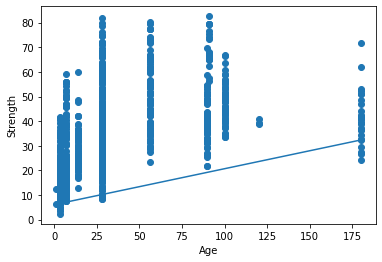

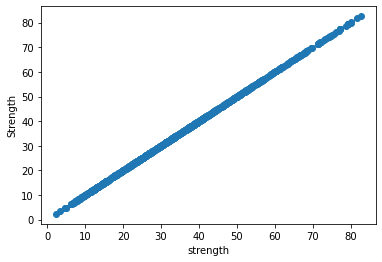

In [136]:
for col in df.columns:
    temp_df=df.sort_values(by=[col])
    temp_df=temp_df.reset_index(drop=True)
    temp_col=temp_df[col]
    temp_strength=temp_df["strength"]
    plt.scatter(temp_col,temp_strength)
    plt.xlabel(col)
    plt.ylabel("Strength")
    plt.plot([temp_col[0],temp_col.iloc[-1]],[temp_strength[0],temp_strength.iloc[-1]])
    plt.show()

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
class RemoveOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, by=3):
        self.by = by
        self.cut_off={}
        self.mean={}
    def fit(self, X, y=None):
        for col in X.columns:
            mean=X[col].mean()
            std =X[col].std()
            self.mean[col]=mean
            self.cut_off[col]=std*self.by
        return self
    def transform(self, X, y=None):
     
        for col in X.columns:
            lower,upper=self.mean[col]-self.cut_off[col],self.mean[col]+self.cut_off[col]
            
            X=X[(X[col]<upper)&(X[col]>lower)]
            
        return X

In [169]:
rm=RemoveOutliers()
rm.fit(df)
df=rm.transform(df)

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
steps=[("scaler",StandardScaler()),("model",RandomForestRegressor())]
pl=Pipeline(steps)

In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:8],df.iloc[:,8],test_size=0.3,random_state=20)
pl.fit(X_train,y_train)
y_pred=pl.predict(X_test)

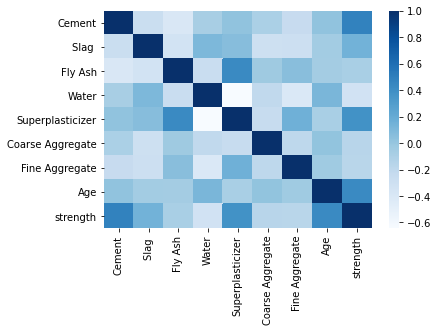

In [80]:
import seaborn as sns
sns.heatmap(df.corr(),cmap="Blues")
plt.show()


In [3]:
import numpy as np
np.arange(0.1,0.7,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [118]:
print(list(zip(df.columns,pl['model'].coef_)))
print(pl["model"].intercept_)

[('Cement', 4.686250087234232), ('Slag ', 2.2114757475923112), ('Fly Ash', -0.0), ('Water', -2.99603331936259), ('Superplasticizer', 2.8027156407846068), ('Coarse Aggregate', -0.48338639767930736), ('Fine Aggregate', -1.4625541620087001), ('Age', 4.638427126615903)]
34.55443148688046


In [127]:
rsme=np.sqrt(mean_squared_error(y_test,y_pred))
print(rsme)

4.98296712715722


In [159]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.912112350796265

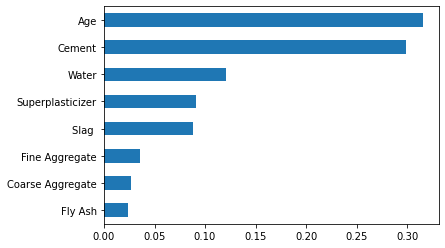

In [135]:
importance_rf=pd.Series(pl["model"].feature_importances_,index=df.iloc[:,0:8].columns)
sorted_importance_rf=importance_rf.sort_values()
sorted_importance_rf.plot(kind="barh")
plt.show()

In [137]:
from sklearn.feature_selection import mutual_info_regression
mutual_info= mutual_info_regression (df.iloc[:,0:8],df.iloc[:,8])
mutual_info=pd.Series(mutual_info,index=df.iloc[:,0:8].columns)
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info

Age                 0.366633
Water               0.359643
Cement              0.284761
Coarse Aggregate    0.240309
Superplasticizer    0.228465
Fine Aggregate      0.191080
Slag                0.183261
Fly Ash             0.140576
dtype: float64

In [150]:
result_df=pd.DataFrame()
df_new=pd.DataFrame()
for i in range(len(mutual_info)):
    col=mutual_info.index[i]
    df_new[col]=df[col]
    pl.fit(pd.DataFrame(df_new),df.iloc[:,8])
    y_pred=pl.predict(pd.DataFrame(df_new))
    r2=r2_score(df.iloc[:,8],y_pred)
    result_df=result_df.append(pd.DataFrame({'r2':r2},index=[i]))
result_df["Features"]=mutual_info.index
result_df

,r2,Features
0,0.405759,Age
1,0.845369,Water
2,0.971089,Cement
3,0.977173,Coarse Aggregate
4,0.979420,Superplasticizer
5,0.981781,Fine Aggregate
6,0.985776,Slag
7,0.986213,Fly Ash


In [172]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(pl,df.iloc[:,0:8],df.iloc[:,8],cv=5,scoring="neg_mean_squared_error")

In [176]:
np.sqrt(cv_result*-1)

array([10.09893069,  8.98252737,  7.88388312,  6.25843762, 14.72672554])

In [177]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'model__n_estimators': n_estimators,
               'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap}

In [179]:
rf_random = RandomizedSearchCV(estimator = pl, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [180]:
rf_random.fit(X_train,y_train)
y_pred=rf_random.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.5min finished


In [181]:
rsme=np.sqrt(mean_squared_error(y_test,y_pred))
print(rsme)

5.100475907138629


In [182]:
r2_score(y_test,y_pred)


0.9120677788901245

In [183]:
rf_random.best_params_

{'model__n_estimators': 400,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': None,
 'model__bootstrap': False}